Step 1: Dataset Setup

Download the mushroom dataset from the provided UCI link:

Mushroom Dataset.

Create a pandas DataFrame for the dataset and add column names. The dataset contains 22 attributes. Refer to the Mushroom Dataset Description for column details.

In [15]:
import pandas as pd

# Define column names as per the dataset description
column_names = [
    "class", "cap-shape", "cap-surface", "cap-color", "bruises", "odor",
    "gill-attachment", "gill-spacing", "gill-size", "gill-color", 
    "stalk-shape", "stalk-root", "stalk-surface-above-ring",
    "stalk-surface-below-ring", "stalk-color-above-ring", 
    "stalk-color-below-ring", "veil-type", "veil-color", "ring-number",
    "ring-type", "spore-print-color", "population", "habitat"
]

# Load data into a pandas DataFrame
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
mushrooms = pd.read_csv(url, header=None, names=column_names)

# Preview the data
print(mushrooms.head())

  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

Step 2: Data Preprocessing

In [16]:
# Select predictor columns
selected_columns = ["odor", "cap-color"]

# Convert categorical predictors to dummy variables
mushrooms_encoded = pd.get_dummies(mushrooms[selected_columns], drop_first=True)

# Add the target variable
mushrooms_encoded["class"] = mushrooms["class"].apply(lambda x: 1 if x == "p" else 0)

2.1: Split the dataset into features (X) and target (y).

In [17]:
from sklearn.model_selection import train_test_split

# Define features and target
X = mushrooms_encoded.drop(columns="class")
y = mushrooms_encoded["class"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step 3: Train Predictive Models

Use predictive classifiers such as LogisticRegression, DecisionTreeClassifier, or RandomForestClassifier to identify the best predictor.

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.99


3.1: Use feature importance from models like RandomForestClassifier to determine which predictor contributes most to the classification.

In [19]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
print("Feature Importances:")
print(feature_importances.sort_values(ascending=False))

Feature Importances:
odor_n         0.406618
odor_f         0.251081
odor_s         0.063513
odor_l         0.060400
odor_y         0.058569
odor_p         0.041457
cap-color_y    0.035799
odor_c         0.030672
cap-color_w    0.016106
cap-color_n    0.009811
cap-color_e    0.009706
cap-color_g    0.005801
odor_m         0.004834
cap-color_p    0.003979
cap-color_c    0.001112
cap-color_u    0.000279
cap-color_r    0.000263
dtype: float64


Hyperparameter Tuning:

Use GridSearchCV or RandomizedSearchCV to optimize the model's parameters:

Step 4: Visualize Results

To enhance insights into the analysis, you can add visualizations for the feature importance and confusion matrix. Below is how to achieve this using matplotlib and seaborn.

C:\Users\MLuca\AppData\Local\Temp\ipykernel_4404\3400037609.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette="viridis")


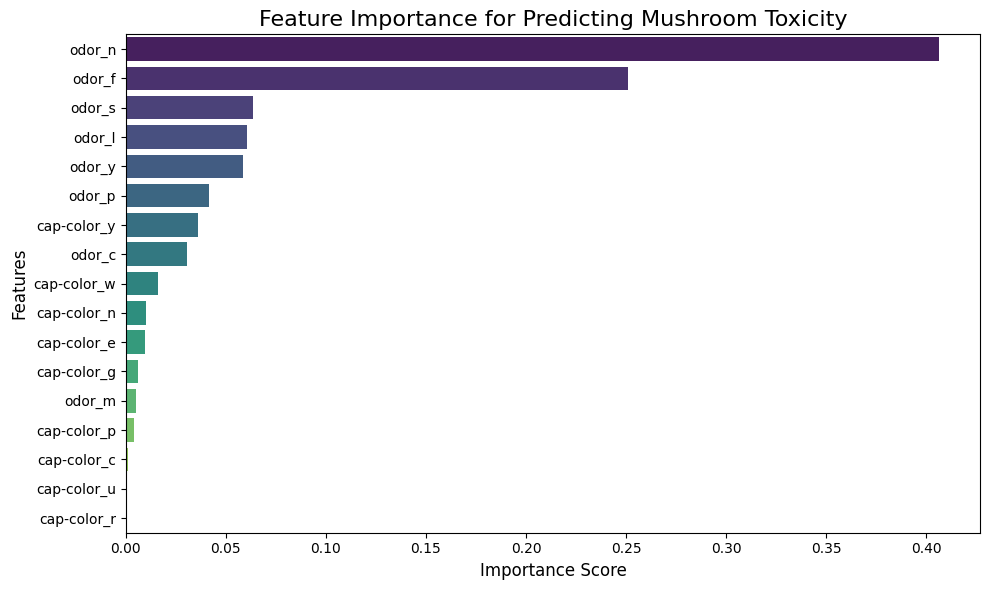

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract feature importance from the model
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette="viridis")
plt.title("Feature Importance for Predicting Mushroom Toxicity", fontsize=16)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.tight_layout()
plt.show()

4.1:  Confusion Matrix

The confusion matrix shows the number of true positives, true negatives, false positives, and false negatives.

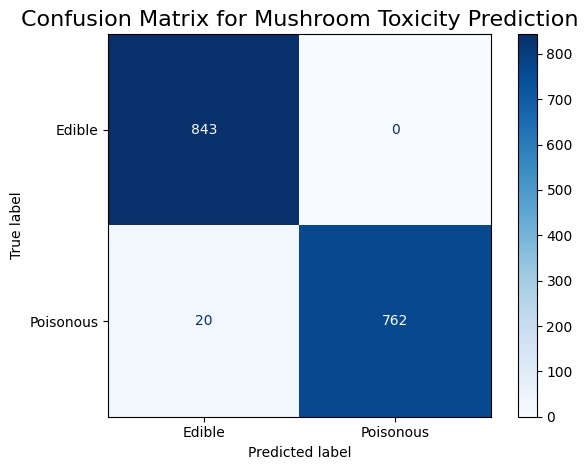

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate predictions
y_pred = model.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Edible", "Poisonous"])
disp.plot(cmap="Blues", values_format="d")

plt.title("Confusion Matrix for Mushroom Toxicity Prediction", fontsize=16)
plt.tight_layout()
plt.show()

4.2: Optional: Correlation Heatmap
To further analyze relationships between predictors, a correlation heatmap can be created.

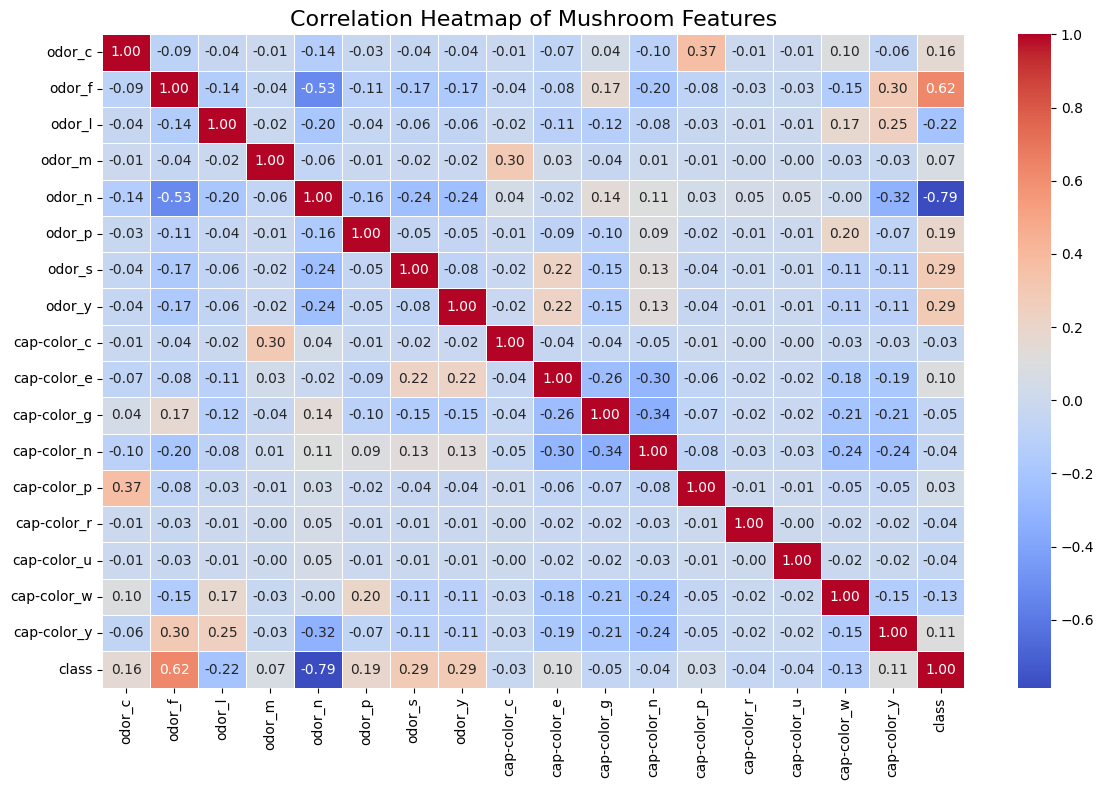

In [22]:
# Compute the correlation matrix
correlation_matrix = mushrooms_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Mushroom Features", fontsize=16)
plt.tight_layout()
plt.show()

In [23]:
print(f"Number of missing values in 'class': {data['class'].isnull().sum()}")


Number of missing values in 'class': 0


In [24]:
data = data.dropna(subset=['class'])


In [25]:
data['class'] = data['class'].fillna(data['class'].mode()[0])


In [26]:
print(f"Number of missing values in 'class' after cleaning: {data['class'].isnull().sum()}")


Number of missing values in 'class' after cleaning: 0


In [27]:
data['class'] = data['class'].astype(int)


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
columns = [
    'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
    'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
    'stalk-surface-below-ring', 'stalk-color-above-ring',
    'stalk-color-below-ring', 'veil-type', 'veil-color',
    'ring-number', 'ring-type', 'spore-print-color', 
    'population', 'habitat', 'class'
]
data = pd.read_csv(url, names=columns)

# Map 'class' column to binary labels: Edible=0, Poisonous=1
data['class'] = data['class'].map({'e': 0, 'p': 1})

# Check for missing values in the 'class' column
print(f"Missing values in 'class': {data['class'].isnull().sum()}")

# Fill missing values with the most common value (mode)
data['class'] = data['class'].fillna(data['class'].mode()[0])

# Confirm no missing values remain
print(f"Missing values in 'class' after cleaning: {data['class'].isnull().sum()}")

# Convert 'class' column to integer type
data['class'] = data['class'].astype(int)

# Recheck data type of 'class'
print(f"Data type of 'class': {data['class'].dtype}")

# Select predictor columns
predictors = ['odor', 'cap-color']

# One-hot encode the predictors
data_encoded = pd.get_dummies(data[predictors], drop_first=True)
X = data_encoded
y = data['class']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of the model using predictors {predictors}: {accuracy:.2f}")


Missing values in 'class': 6980
Missing values in 'class' after cleaning: 0
Data type of 'class': int32
Accuracy of the model using predictors ['odor', 'cap-color']: 1.00


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
columns = [
    'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
    'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
    'stalk-surface-below-ring', 'stalk-color-above-ring',
    'stalk-color-below-ring', 'veil-type', 'veil-color',
    'ring-number', 'ring-type', 'spore-print-color', 
    'population', 'habitat'
]
data = pd.read_csv(url, names=columns)

# Map 'class' column to binary labels: Edible=0, Poisonous=1
data['class'] = data['class'].map({'e': 0, 'p': 1})

# Handle missing values in 'class' column
data['class'] = data['class'].fillna(data['class'].mode()[0])

# Select predictors to evaluate
predictors = ['odor', 'cap-color']

# Evaluate each predictor separately
results = {}
for predictor in predictors:
    # One-hot encode the predictor column
    X = pd.get_dummies(data[[predictor]], drop_first=True)
    y = data['class']

    # Split into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Train a Decision Tree Classifier
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Evaluate accuracy
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[predictor] = accuracy

# Print results
for predictor, accuracy in results.items():
    print(f"Accuracy using '{predictor}' as a predictor: {accuracy:.2f}")

# Identify the best predictor
best_predictor = max(results, key=results.get)
print(f"The best predictor is '{best_predictor}' with an accuracy of {results[best_predictor]:.2f}")


Accuracy using 'odor' as a predictor: 0.98
Accuracy using 'cap-color' as a predictor: 0.59
The best predictor is 'odor' with an accuracy of 0.98


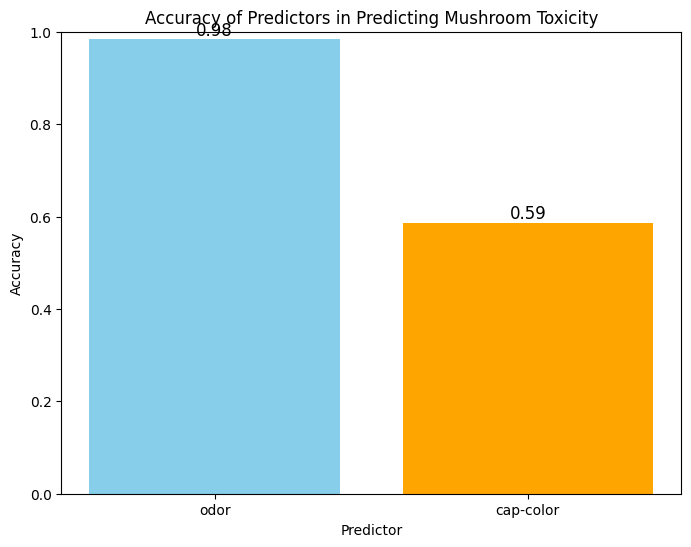

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
columns = [
    'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
    'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
    'stalk-surface-below-ring', 'stalk-color-above-ring',
    'stalk-color-below-ring', 'veil-type', 'veil-color',
    'ring-number', 'ring-type', 'spore-print-color', 
    'population', 'habitat'
]
data = pd.read_csv(url, names=columns)

# Map 'class' column to binary labels: Edible=0, Poisonous=1
data['class'] = data['class'].map({'e': 0, 'p': 1})

# Handle missing values in 'class' column
data['class'] = data['class'].fillna(data['class'].mode()[0])

# Select predictors to evaluate
predictors = ['odor', 'cap-color']

# Evaluate each predictor separately
results = {}
for predictor in predictors:
    # One-hot encode the predictor column
    X = pd.get_dummies(data[[predictor]], drop_first=True)
    y = data['class']

    # Split into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Train a Decision Tree Classifier
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Evaluate accuracy
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[predictor] = accuracy

# Plot the results
plt.figure(figsize=(8, 6))
plt.bar(results.keys(), results.values(), color=['skyblue', 'orange'])
plt.xlabel('Predictor')
plt.ylabel('Accuracy')
plt.title('Accuracy of Predictors in Predicting Mushroom Toxicity')
plt.ylim(0, 1)
plt.xticks(rotation=0)
for predictor, accuracy in results.items():
    plt.text(predictor, accuracy, f'{accuracy:.2f}', ha='center', va='bottom', fontsize=12)

# Display the graph
plt.show()